Initially the data has to be read and analysed.
For this to be done, several libraries have to be in place
Libraries such as pandas, numpy and for looking at the plots, matplotlib.

To instal these libraries open CMD, PS or GitBash as admin and run these commands:

- pandas    - pip install pandas
- numpy     - pip install numpy
- matplotlib- pip install matplotlib

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The next steps are to impoort your libraries (change the location of where they are located in your system)

In [104]:
train = pd.read_csv('D:/Projects/Modelling-using-text-mining-algorithms/train.csv')
test = pd.read_csv('D:/Projects/Modelling-using-text-mining-algorithms/test.csv')

Once the test data ha been loaded, we can then have a look at what the data actually holds

In [105]:
df = train

In [106]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


From the data description we can see that there are various columns relating to the product categoeires, sales and purchases. 
To make it more clear let's get more information about the dataset

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Dataframe information method ('df.info') provides information about a DataFrame including the index dtype and columns.
This gives a better insight of what we're exactly looking at.

Let's see if we can use this information to find out more about certain columns

In [108]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


<Axes: >

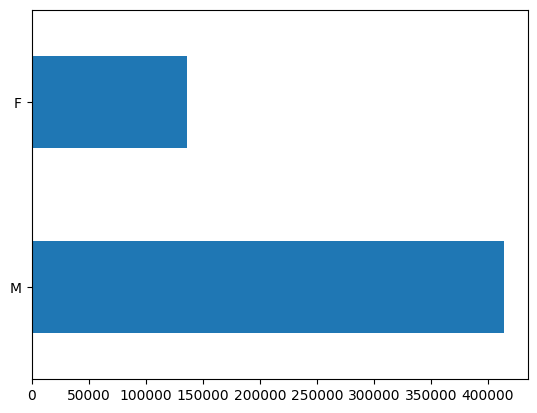

In [109]:
df['Gender'].value_counts().plot(kind='barh')

From the plot we can see that there have been more male customers than female, but let's check who spent more money

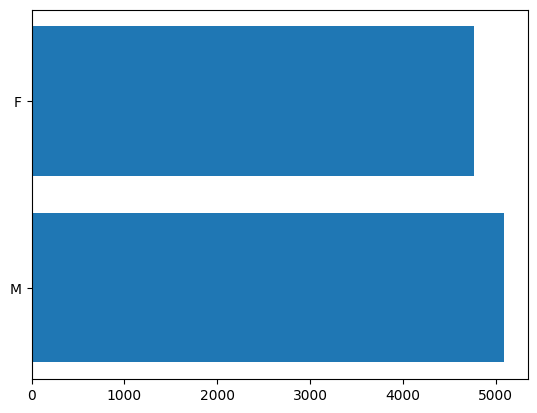

In [110]:
money_spent = []
genders = df['Gender'].value_counts().index.tolist()
for sex in genders:
    money_spent.append(df[df['Gender'] == sex]['Purchase'].std())

plt.barh(genders, money_spent )
plt.show()

In here we take the genders column from the dataframe and put everything in a list that contains all the customers.
Then, to find out which gender spends more money we look at the dataset and see where each gender made a purchase and compute the standard deviation along the specified axis using numpy library.
Then using matplotlib we build a plot to outline money spent by gender.

We looked who spends and shops more, where we found out that males have shooped more and spent more during Black Friday sales. 
Now, we will look at the age group which was shopping at the time.

Firstly in our train (df) dataset and then our test dataset.

In [111]:
print(df['Age'].value_counts())
print("\n")
print(test['Age'].value_counts())

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


26-35    93428
36-45    46711
18-25    42293
46-50    19577
51-55    16283
55+       9075
0-17      6232
Name: Age, dtype: int64


We see the most customers in the 26-35 range and the lowest range is varying between 0-17 and 55+ age groups.

Let's have a look which age group spent the most.

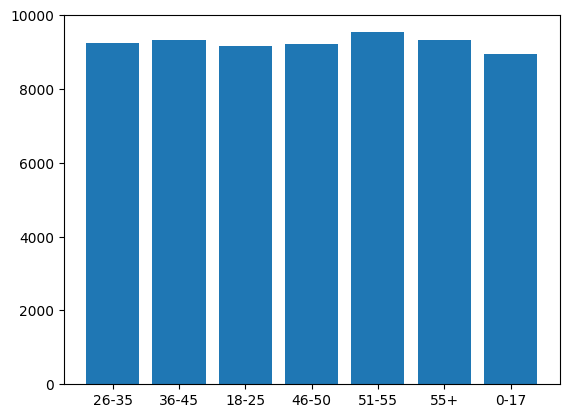

In [112]:
money_spent = []
ages = df['Age'].value_counts().index.tolist()
for age in ages:
    money_spent.append(df[df['Age'] == age]['Purchase'].mean())

plt.bar(ages, money_spent )
plt.show()

We're doing the exact same thing as we were before and calculating the mean along the specified axis using numpy library. 

<Axes: >

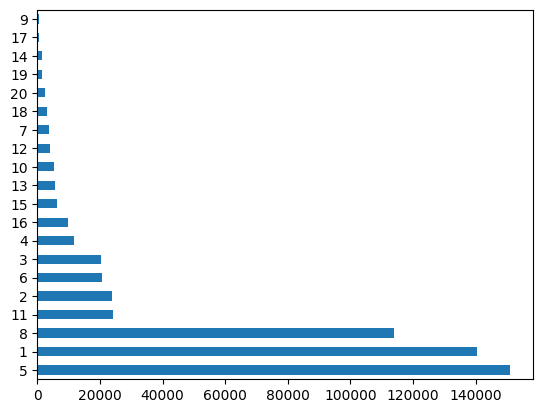

In [113]:
df['Product_Category_1'].value_counts().plot(kind='barh')

From Here we can see that the spending has the average (mean) for a particular product.

<BarContainer object of 20 artists>

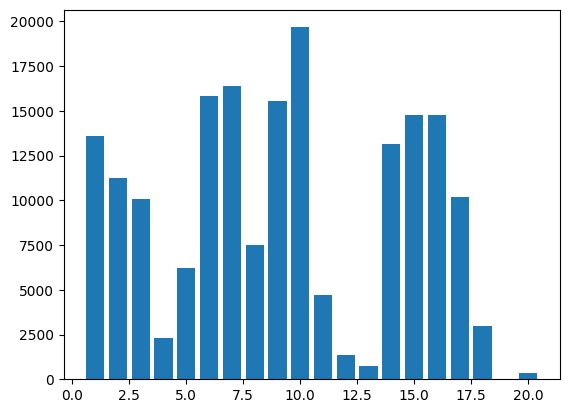

In [114]:
spent_money = list()
products = df['Product_Category_1'].value_counts().index.tolist()
for pid in products:
    spent_money.append(df[df['Product_Category_1'] == pid]['Purchase'].mean())
plt.bar(products, spent_money)

<Axes: >

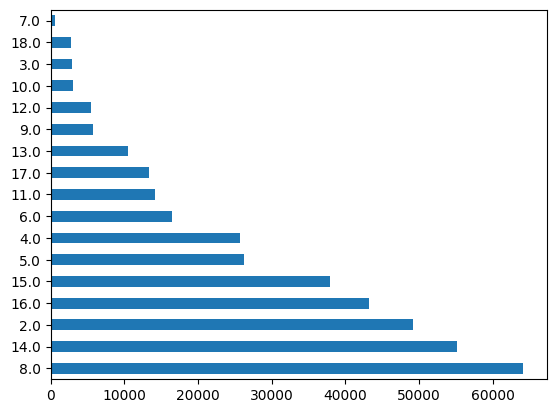

In [115]:
df['Product_Category_2'].value_counts().plot(kind='barh')

<BarContainer object of 17 artists>

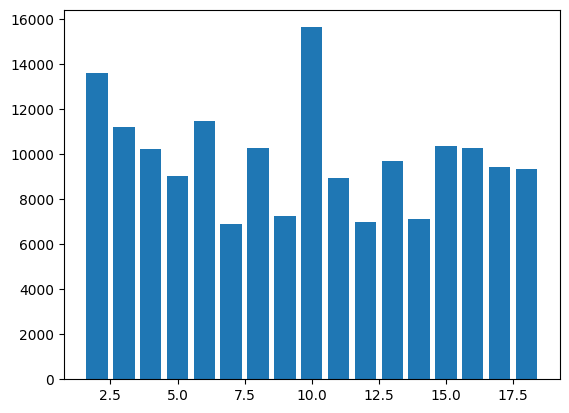

In [116]:
spent_money = list()
products = df['Product_Category_2'].value_counts().index.tolist()
for pid in products:
    spent_money.append(df[df['Product_Category_2'] == pid]['Purchase'].mean())
plt.bar(products, spent_money)

We have looked at examples of spending within various categories, compared and analysed them. At this point, you should have a thoroough understanding of the dataset and be able to recognise to analysed yourself further with no issues.

But now we will get to the interesting part, the modelling of the dataset.

First, let's install different models and processing functions from the sklearn library.

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import xgboost as xg
import math

Let's define the columns by defining the data we want to process, remove the unnecessary data by dropping them from the dataset.

In [118]:
# cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']
# drop_cols = ['User_ID', 'Product_ID', 'Product_Category_3', 'Purchase']
# X1 = pd.get_dummies(df, columns=cols)
# X = X1.drop(columns = drop_cols)
# X

Since we have defined the columns, let's define more detailed categories.
We are constructing a temp dataset from several different categories and will have the rows of purchace. 

In [119]:
# Y = df['Purchase']
# c = ['Product_Category_1','Product_Category_2']
# x = df[c]

We have setup our data, now let's get Linear Regression (LR) setup.
Initially, we define the regressor, we use LR because it works by predicting a variable value by looking at another variable value. 
Now the dataset has to be split into several different categories:

X_train, Y_train - these bins are for training dat, where we will use this data with the model to try and fit the values
X_test, Y_test - are the bins which will be tested against, i.e., we will check whether or not the model has managed to learn about the values and then predict them. 

In [120]:
df.fillna(method ='ffill', inplace = True)

In [121]:
X = np.array(df['Purchase']).reshape(-1, 1)
c = ['Product_Category_1','Product_Category_2']
y = np.array(df['Product_Category_2']).reshape(-1, 1)

# Separating the data into independent and dependent variables

# Converting each dataframe into a numpy array 

# since each dataframe contains only one column

df.dropna(inplace = True)

# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data

regr = LinearRegression()

regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)

print("Mean absolute error of prediction: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error of prediction: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score of prediction: ", metrics.r2_score(y_test, y_pred))

ValueError: Input contains NaN.

In [ ]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

# Data scatter of predicted values

In [ ]:




# Y = np.array(df['Purchase']).reshape(-1, 1)
# c = ['Product_Category_1','Product_Category_2']
# X = np.array(df[c]).reshape(-1, 1)
# df.dropna(inplace = True)

In [ ]:
# regressor = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

ValueError: Found input variables with inconsistent numbers of samples: [1100136, 550068]

Now all there's left to do is fit the dataset with the train data and check whether it can predict the test data. 

In [ ]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Once that has been fitted we can priont out the score using metrics library to measure the prediction of the dataset. 

The sklearn.metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics. All scorer objects follow the convention that higher return values are better than lower return values.

In [ ]:
print("Mean absolute error of prediction: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error of prediction: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score of prediction: ", metrics.r2_score(y_test, y_pred))

Mean absolute error of prediction:  5.54238625465749e-12
Mean squared error of prediction:  6.846532891140145e-12
R2 score of prediction:  1.0


In this case we are looking at the error of prediction and the R2 score. "Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a 
 score of 0.0." - scikit-learn.org

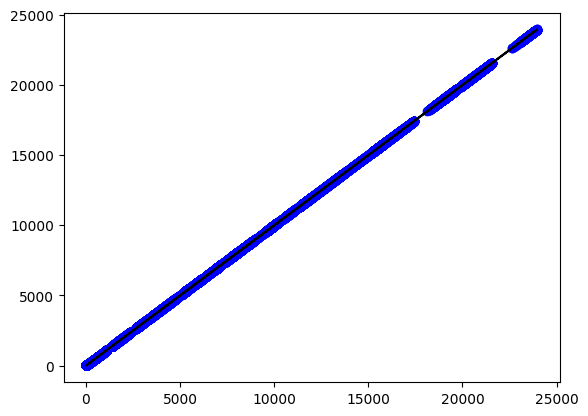

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()